# DATA ANALYSIS OF ZOMATO RESTAURANTS IN BANGALORE

Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing the file

In [2]:
data = pd.read_csv('zomato.csv')
data.head(10) # inspecting the first 10 rows

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [190]:
data.info() #general overview of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [191]:
data.describe() #taking an overview of the data

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


Converting the 'Rate' column from str to float

In [192]:
data['rate'] = data['rate'].apply(lambda x: str(x).replace('/5','') if '/5' in str(x) else str(x))
data.rate

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713     nan
51714     nan
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

In [193]:
data['rate'] = pd.to_numeric(data['rate'],errors='coerce')
data['approx_cost(for two people)'] = pd.to_numeric(data['approx_cost(for two people)'],errors='coerce')
data.rate

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [222]:
data[data.rate>5]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


Filling up the NaN with median value

In [194]:
data['rate'].fillna(value=data['rate'].median(), inplace = True)
data['approx_cost(for two people)'].fillna(value=data['approx_cost(for two people)'].median(), inplace = True)

In [200]:
data['approx_cost(for two people)'].isnull().sum()

0

In [201]:
data.rate.isnull().sum()

0

In [188]:
data.dish_liked.isnull().sum()

28078

Creating a list of all preferred dishes from the entire Column 'dish_liked'

In [176]:
b=[]
for d in data.dish_liked[data.dish_liked.isnull() = False]:
       a=d.split(',')
       for i in a:
             i=i.strip()
             b.append(i)

In [165]:
b

['Pasta',
 'Lunch Buffet',
 'Masala Papad',
 'Paneer Lajawab',
 'Tomato Shorba',
 'Dum Biryani',
 'Sweet Corn Soup',
 'Momos',
 'Lunch Buffet',
 'Chocolate Nirvana',
 'Thai Green Curry',
 'Paneer Tikka',
 'Dum Biryani',
 'Chicken Biryani',
 'Churros',
 'Cannelloni',
 'Minestrone Soup',
 'Hot Chocolate',
 'Pink Sauce Pasta',
 'Salsa',
 'Veg Supreme Pizza',
 'Masala Dosa',
 'Panipuri',
 'Gol Gappe',
 'Onion Rings',
 'Pasta',
 'Kadhai Paneer',
 'Salads',
 'Salad',
 'Roti',
 'Jeera Rice',
 'Farmhouse Pizza',
 'Chocolate Banana',
 'Virgin Mojito',
 'Pasta',
 'Paneer Tikka',
 'Lime Soda',
 'Prawn Pizza',
 'Pizza',
 'Mocktails',
 'Coffee',
 'Nachos',
 'Salad',
 'Pasta',
 'Sandwiches',
 'Waffles',
 'Pasta',
 'Coleslaw Sandwich',
 'Choco Waffle',
 'Tacos',
 'Momos',
 'Cheese Nachos',
 'Waffles',
 'Pasta',
 'Crispy Chicken',
 'Honey Chilli Chicken',
 'Sandwich',
 'Coffee',
 'Crepe',
 'Mocktails',
 'Peri Fries',
 'Lasagne',
 'Pizza',
 'Chicken Bbq Wings',
 'Virgin Mojito',
 'Nachos',
 'Coffee',
 

Top 5 liked dishes

In [390]:
a = [(idx, item) for idx,item in enumerate(b)]
dishes = pd.DataFrame(a, columns= ('index','dish'))
top_5_dish = dishes.dish.value_counts().head()
top_5_dish

Pasta        3409
Burgers      3024
Cocktails    2832
Pizza        2737
Biryani      2092
Name: dish, dtype: int64

Text(0, 0.5, 'count')

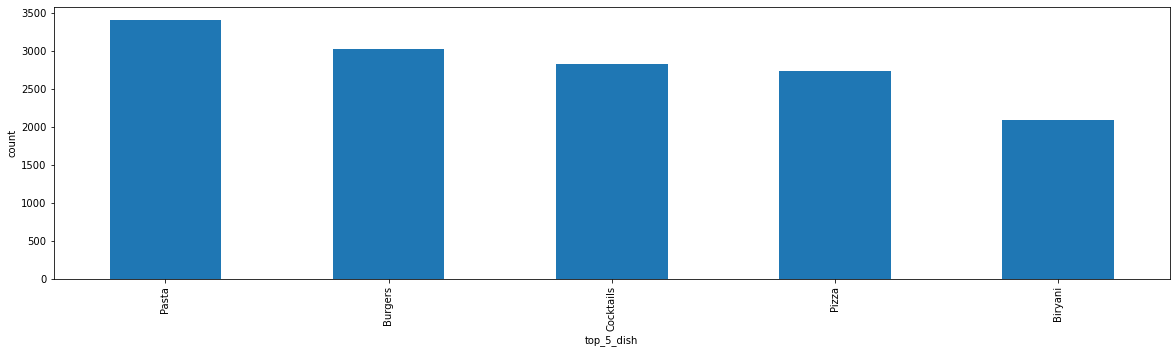

In [417]:
plt.figure(figsize=(20,5))
top_5_dish.plot(kind = 'bar')
plt.xlabel('top_5_dish')
plt.ylabel('count')

In [382]:
#a = [(idx, item) for idx,item in enumerate(b)]
#dishes = pd.DataFrame(a, columns= ('index','dish'))
#dishes_df = pd.DataFrame(dishes.groupby('dish').size(), columns = ['count'])
#top_5_dishes = dishes_df.sort_values(by = 'count', ascending = False).head()
#top_5_dishes          
#[alternate formula for above code]

In [376]:
#top_5_dish = dishes.groupby('dish').size().sort_values(ascending= False).head() [alternate formula for above code]

Filling up the NaN values in column 'dish_liked' with the mode value [the top five dishes in this case]

In [205]:
data.dish_liked.fillna('Pasta, Burgers, Cocktails, Pizza, Biryani', inplace= True)
data.dish_liked.isnull().sum()

0

Filling up the NaN values in column 'rest_type' with the mode value

In [410]:
data.rest_type.fillna(data.rest_type.mode(), inplace= True)
data.rest_type.isnull().sum()

0

In [250]:
data.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
phone                          1208
location                         21
rest_type                         0
dish_liked                        0
cuisines                         45
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [ ]:
data.drop('menu_item', axis =1, inplace = True) #dropping column 'menu_item', since all it's vales are empty objects

In [267]:
group_by_name = data.groupby('name').size().sort_values(ascending= False)
group_by_name 

name
Cafe Coffee Day                     96
Onesta                              85
Just Bake                           73
Empire Restaurant                   71
Five Star Chicken                   70
                                    ..
Cool Break                           1
The Shake Factory Originals          1
Nethravathi Military Hotel           1
Swadisht North Indian Restaurant     1
Night Punjabi Folk                   1
Length: 8792, dtype: int64

In [328]:
data.name.value_counts() # alternate command for above

Cafe Coffee Day                 96
Onesta                          85
Just Bake                       73
Empire Restaurant               71
Five Star Chicken               70
                                ..
Thakur's Kitchen                 1
Vah Biryani                      1
Davanagere Butter Dosa Hotel     1
Lee Momoz                        1
Time to Eat                      1
Name: name, Length: 8792, dtype: int64

In [314]:
gf=data.groupby('listed_in(city)')

In [337]:
x= (gf.rate.mean()).round(decimals=1)
x

listed_in(city)
BTM                      3.7
Banashankari             3.7
Bannerghatta Road        3.6
Basavanagudi             3.7
Bellandur                3.6
Brigade Road             3.8
Brookefield              3.6
Church Street            3.8
Electronic City          3.6
Frazer Town              3.7
HSR                      3.7
Indiranagar              3.7
JP Nagar                 3.6
Jayanagar                3.7
Kalyan Nagar             3.7
Kammanahalli             3.7
Koramangala 4th Block    3.7
Koramangala 5th Block    3.7
Koramangala 6th Block    3.8
Koramangala 7th Block    3.7
Lavelle Road             3.8
MG Road                  3.8
Malleshwaram             3.7
Marathahalli             3.6
New BEL Road             3.6
Old Airport Road         3.7
Rajajinagar              3.7
Residency Road           3.8
Sarjapur Road            3.6
Whitefield               3.6
Name: rate, dtype: float64

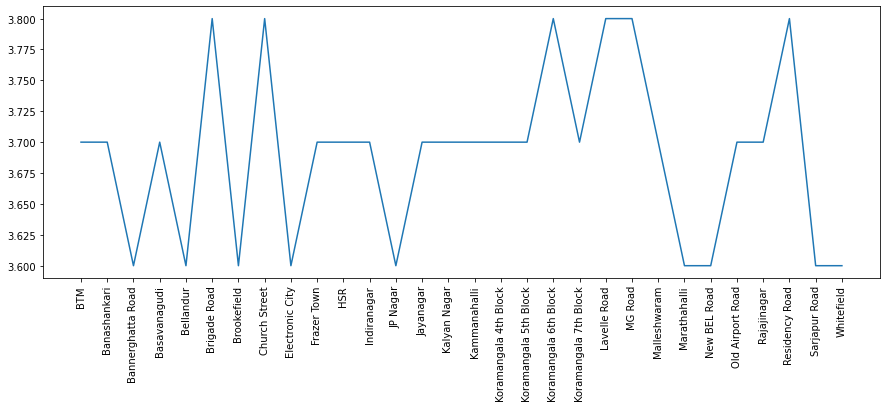

In [338]:
plt.figure(figsize=(15,5))
plt.plot(x)
y = plt.xticks(rotation=90)


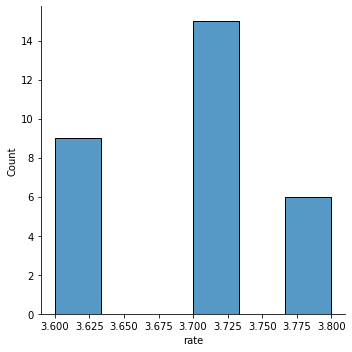

In [339]:
sns.displot(x)

In [327]:
data.location.value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

## EXPLORATORY DATA ANALYSIS

Comparison of offline and online stores

C:\Users\Gaurab Mondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


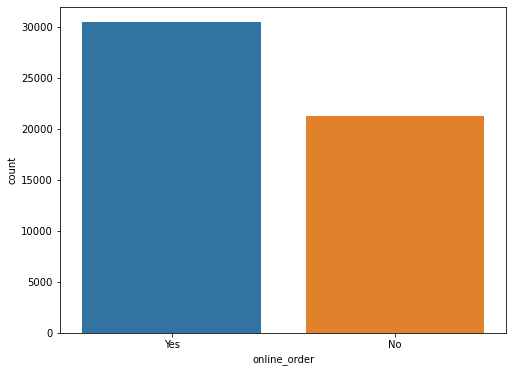

In [425]:
plt.figure(figsize=[8,6])
sns.countplot(data['online_order'])
plt.show()

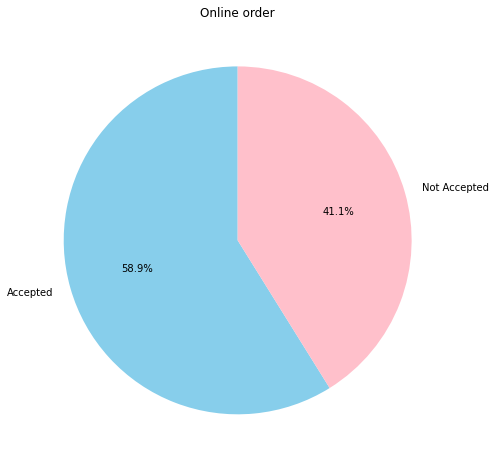

In [432]:
plt.figure(figsize=[10,8])
plt.pie(data['online_order'].value_counts(), labels=['Accepted', 'Not Accepted'], autopct='%1.1f%%', colors=['skyblue', 'pink'],
        startangle=90)
plt.title('Online order')
plt.show()

Table booking

C:\Users\Gaurab Mondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


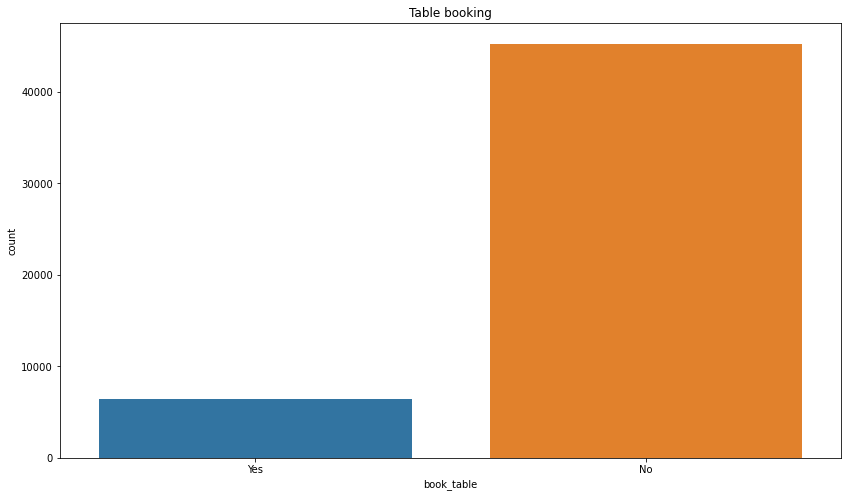

In [340]:
plt.figure(figsize=[14,8])
sns.countplot(data['book_table'])
plt.title('Table booking')
plt.show()

In [421]:
pd.crosstab(data['rate'], data['book_table']).head()

book_table,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,24,0
2.2,13,13
2.3,51,0


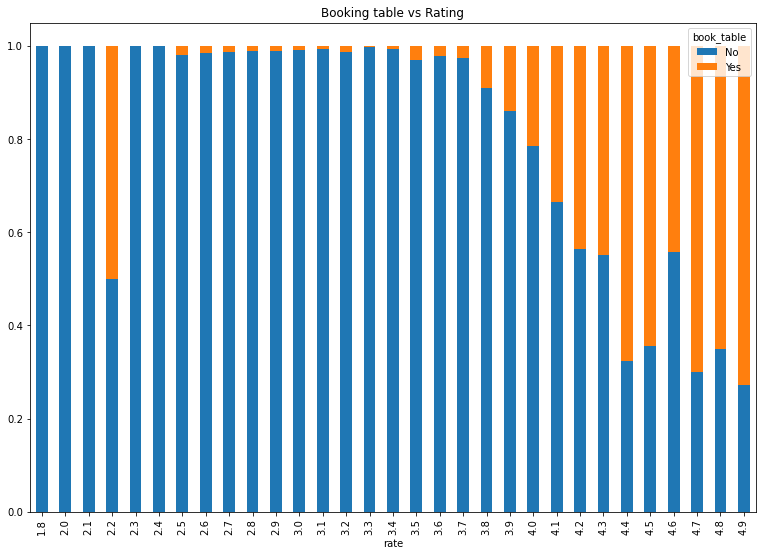

In [419]:
cr= pd.crosstab(data['rate'], data['book_table'])
cr.div(cr.sum(1).astype(float),axis=0).plot(kind='bar', stacked = True)
plt.title('Booking table vs Rating')
plt.show()

Location wise analysis

C:\Users\Gaurab Mondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


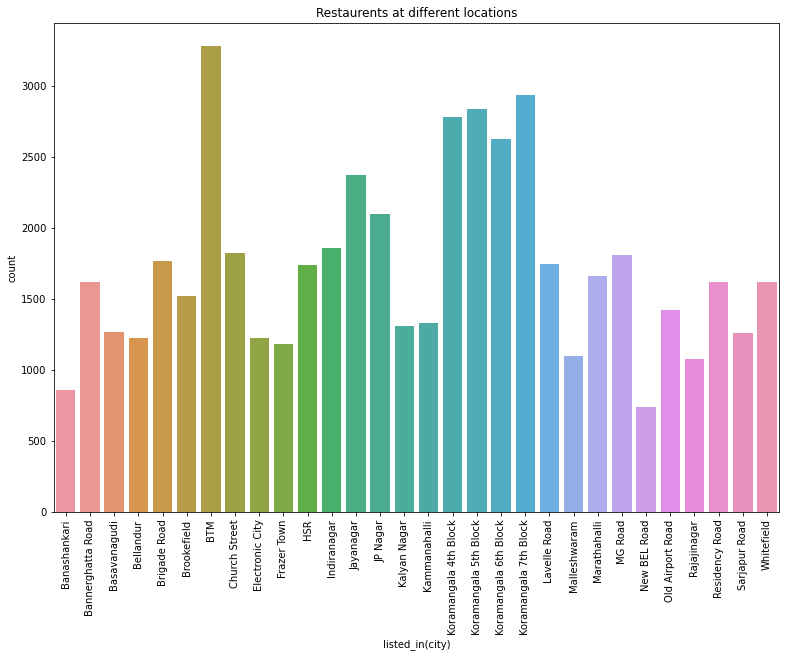

In [433]:
sns.countplot(data['listed_in(city)'])
plt.xticks(rotation =90)
plt.title('Restaurents at different locations')
plt.show()

BTM has the highest number of restaurents.

In [436]:
data['listed_in(type)'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [438]:
data['listed_in(type)'].value_counts(normalize=True)*100

Delivery              50.161456
Dine-out              34.377477
Desserts               6.947425
Cafes                  3.331593
Drinks & nightlife     2.128894
Buffet                 1.705435
Pubs and bars          1.347719
Name: listed_in(type), dtype: float64

C:\Users\Gaurab Mondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


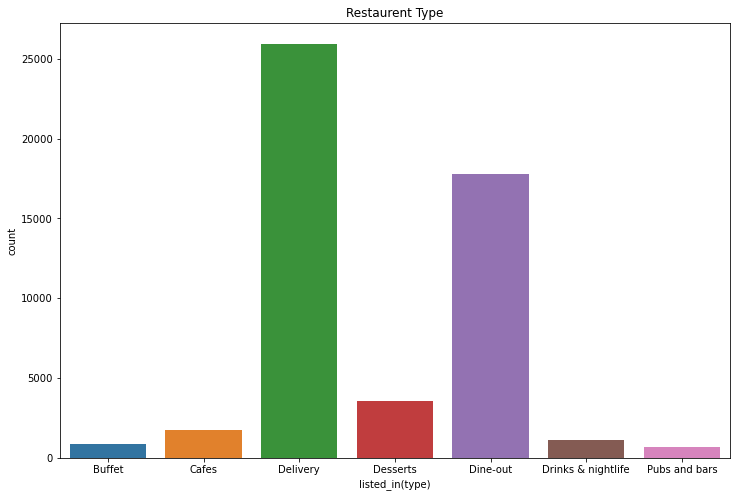

In [439]:
plt.figure(figsize=[12,8])
sns.countplot(data['listed_in(type)'])
plt.title('Restaurent Type')
plt.show()

Delivery and Dine-out's are more popular than others

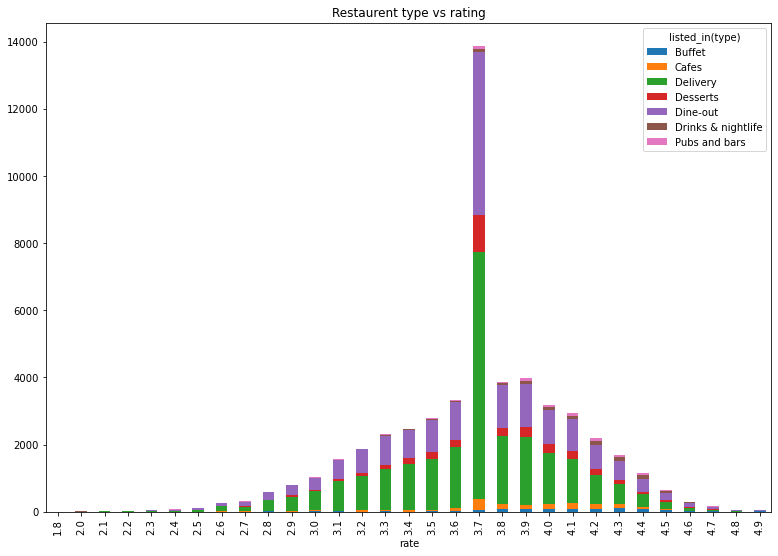

In [440]:
pd.crosstab(data['rate'], data['listed_in(type)']).plot(kind='bar',stacked=True)
plt.title('Restaurent type vs rating')
plt.show()

C:\Users\Gaurab Mondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


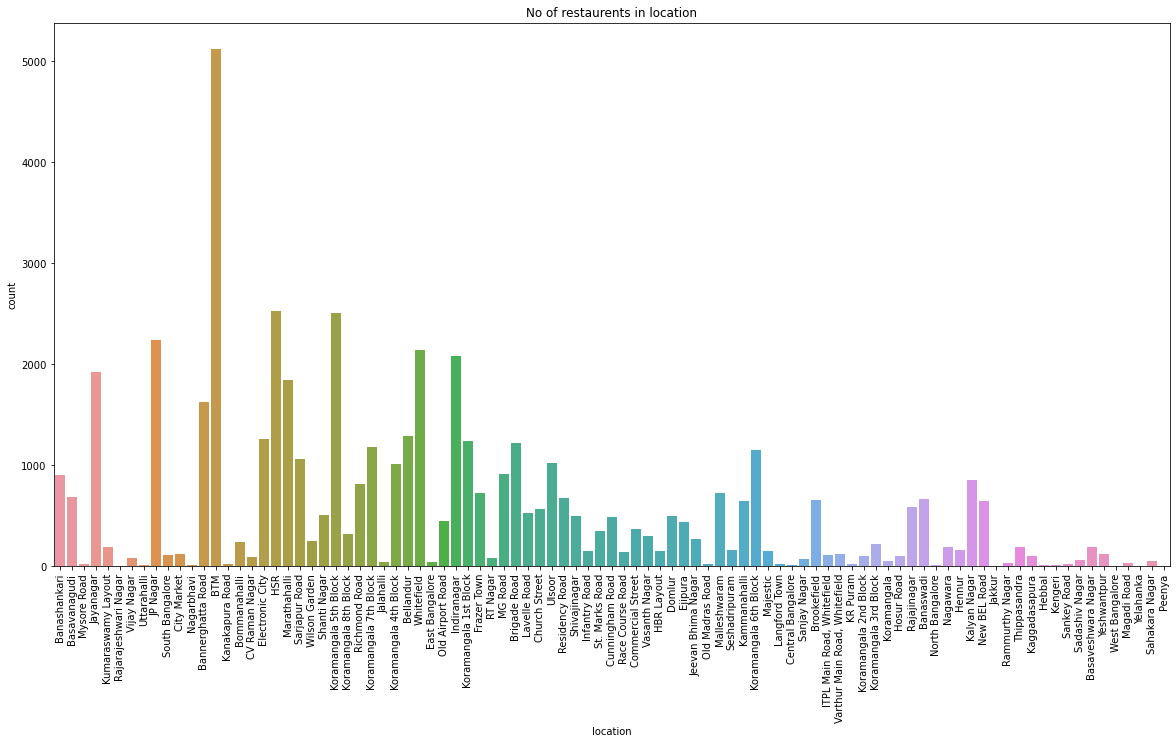

In [441]:
plt.figure(figsize=[20,10])
sns.countplot(data['location'])
plt.title('No of restaurents in location')
plt.xticks(rotation=90)
plt.show()

In [442]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 0, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
       '

C:\Users\Gaurab Mondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


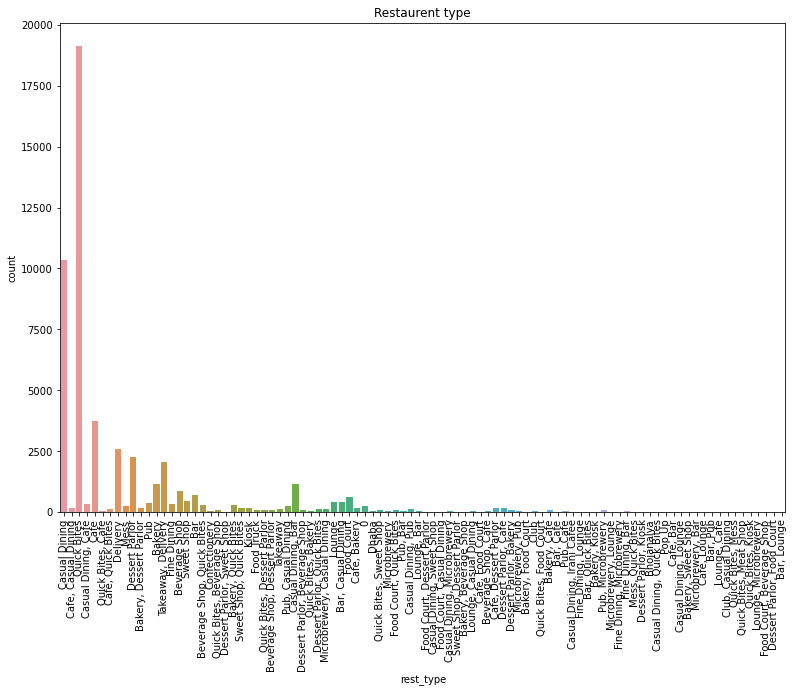

In [443]:
sns.countplot(data['rest_type'])
plt.title('Restaurent type')
plt.xticks(rotation=90)
plt.show()

Quick-Bites and casual dining are the most popular restaurent type

In [444]:
data['name'].value_counts()[:20]

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Chef Baker's         62
Pizza Hut            62
Subway               60
Sweet Truth          60
Beijing Bites        60
Domino's Pizza       60
KFC                  60
Smoor                59
McDonald's           59
Chai Point           58
Faasos               57
Name: name, dtype: int64

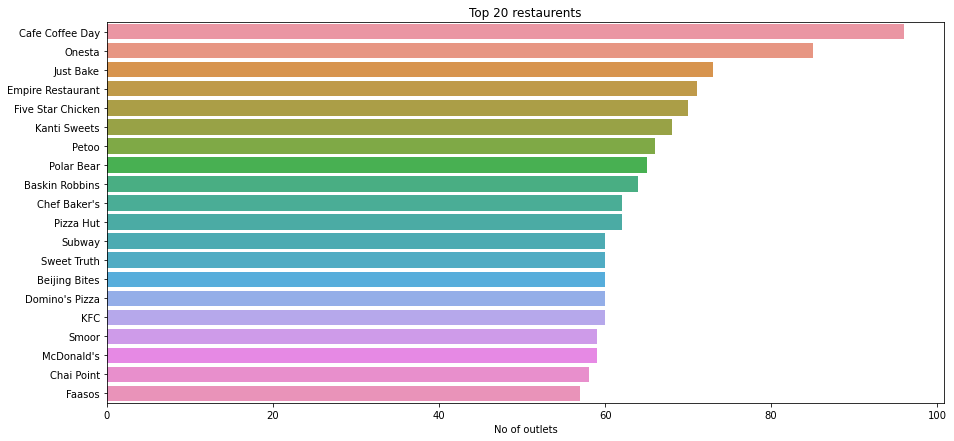

In [445]:
plt.figure(figsize=[15,7])
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index)
plt.title('Top 20 restaurents')
plt.xlabel('No of outlets')
plt.show()

Dropping all unnecssary columns

In [447]:
data.drop(['address','name','reviews_list'], axis=1, inplace=True)

In [448]:
data.head(3)

,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari


In [450]:
data_rating=data.sort_values('rate', ascending=False)
data_rating.head()

,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
37843,https://www.zomato.com/bangalore/belgian-waffl...,Yes,No,4.9,1749,+91 9481511911,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Delivery,Lavelle Road
34734,https://www.zomato.com/bangalore/asia-kitchen-...,Yes,Yes,4.9,2249,080 49652573,Koramangala 5th Block,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",400.0,Buffet,Koramangala 7th Block
10879,https://www.zomato.com/bangalore/asia-kitchen-...,Yes,Yes,4.9,2178,080 49652573,Koramangala 5th Block,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",400.0,Dine-out,BTM
39559,https://www.zomato.com/bangalore/punjab-grill-...,Yes,Yes,4.9,1940,+91 8022682400,Malleshwaram,Casual Dining,"Chicken Malai Tikka, Jalebi Rabri, Paneer Tikk...","North Indian, Mughlai",400.0,Delivery,Malleshwaram
42381,https://www.zomato.com/bangalore/belgian-waffl...,Yes,No,4.9,1750,+91 9481511911,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Delivery,MG Road


In [451]:
data_votes=data.sort_values('votes', ascending=False)
data_votes.head()

,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
49170,https://www.zomato.com/bangalore/byg-brewski-b...,Yes,Yes,4.9,16832,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",400.0,Delivery,Sarjapur Road
50059,https://www.zomato.com/bangalore/byg-brewski-b...,Yes,Yes,4.9,16832,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",400.0,Drinks & nightlife,Sarjapur Road
49627,https://www.zomato.com/bangalore/byg-brewski-b...,Yes,Yes,4.9,16832,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",400.0,Dine-out,Sarjapur Road
3921,https://www.zomato.com/bangalore/byg-brewski-b...,Yes,Yes,4.9,16345,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",400.0,Delivery,Bellandur
4801,https://www.zomato.com/bangalore/byg-brewski-b...,Yes,Yes,4.9,16345,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",400.0,Dine-out,Bellandur


In [454]:
data_cost=data.sort_values('approx_cost(for two people)', ascending=False)
data_cost.head()

,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
7315,https://www.zomato.com/bangalore/pindi-bangalo...,No,No,3.7,0,+91 6363701507,Whitefield,Casual Dining,"Pasta, Burgers, Cocktails, Pizza, Biryani","North Indian, Chinese, Biryani, Street Food",950.0,Delivery,Brookefield
2304,https://www.zomato.com/bangalore/the-onyx-the-...,No,No,3.3,177,+91 9742281239\r\n+91 8884404894,JP Nagar,Casual Dining,"Chaat, Custard, Fish, Pepper Chicken, Lunch Bu...","North Indian, Chinese, Continental",950.0,Dine-out,Bannerghatta Road
6737,https://www.zomato.com/bangalore/engine-ulsoor...,No,No,3.3,16,+91 8884446940\r\n080 25547777,Ulsoor,"Casual Dining, Bar","Pasta, Burgers, Cocktails, Pizza, Biryani","Biryani, South Indian, North Indian, Chinese, ...",950.0,Pubs and bars,Brigade Road
42577,https://www.zomato.com/bangalore/ayda-persian-...,Yes,No,3.9,227,080 41478209\n080 25586522,Church Street,Casual Dining,"Roti, Naan, Butter Chicken, Biryani, Saffron R...","North Indian, Iranian",950.0,Delivery,MG Road
6196,https://www.zomato.com/bangalore/ayda-persian-...,Yes,No,3.9,224,080 41478209\r\n080 25586522,Church Street,Casual Dining,"Roti, Naan, Butter Chicken, Biryani, Saffron R...","North Indian, Iranian",950.0,Dine-out,Brigade Road


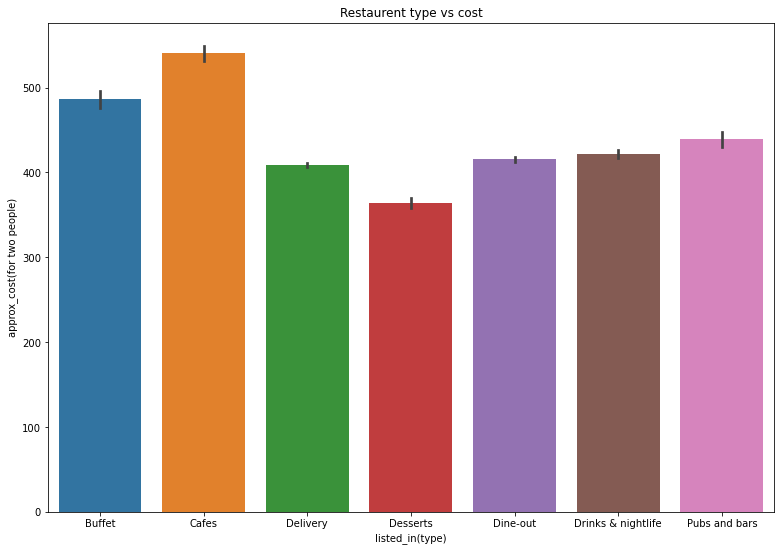

In [456]:
sns.barplot(x=data['listed_in(type)'],y=data['approx_cost(for two people)'],data=data)
plt.title('Restaurent type vs cost')
plt.show()

Drinks and nightlife is expensive, next folows Buffet and Pubs and bars

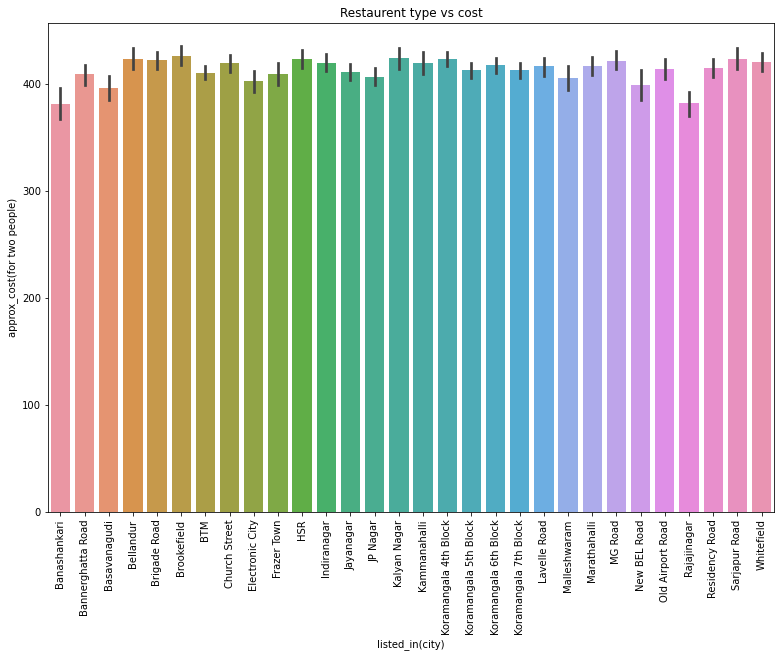

In [457]:
sns.barplot(x=data['listed_in(city)'],y=data['approx_cost(for two people)'],data=data)
plt.xticks(rotation=90)
plt.title('Restaurent type vs cost')
plt.show()

The Church street's restaurents are expensive and next follows Brigade road, Lavelle road,MG road, and Residency road

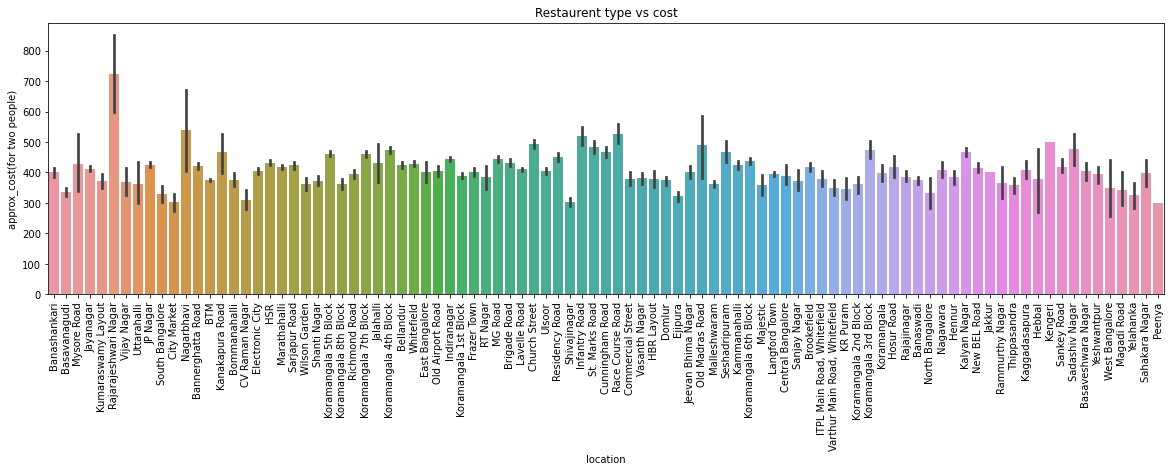

In [460]:
plt.figure(figsize=(20,5))
sns.barplot(x=data['location'],y=data['approx_cost(for two people)'],data=data)
plt.xticks(rotation=90)
plt.title('Restaurent type vs cost')
plt.show()

The restaurents in Sankey road are expensive

Lets dive deep into the data.
1) which type of restaurents fall under below rating==2

In [461]:
data_rate_2= data[data['rate']<=2]
data_rate_2

,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
5963,https://www.zomato.com/bangalore/fusion-lounge...,No,No,2.0,395,+91 8892765772\r\r\n080 41142912,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,400.0,Dine-out,Brigade Road
6300,https://www.zomato.com/bangalore/alibi-maya-in...,No,No,1.8,224,080 25594366\r\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",400.0,Dine-out,Brigade Road
6598,https://www.zomato.com/bangalore/fusion-lounge...,No,No,2.0,395,+91 8892765772\r\n080 41142912,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,400.0,Drinks & nightlife,Brigade Road
12540,https://www.zomato.com/bangalore/alibi-maya-in...,No,No,1.8,224,080 25594366\r\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",400.0,Dine-out,Church Street
12699,https://www.zomato.com/bangalore/fusion-lounge...,No,No,2.0,396,+91 8892765772\r\n080 41142912,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,400.0,Dine-out,Church Street
13259,https://www.zomato.com/bangalore/fusion-lounge...,No,No,2.0,396,+91 8892765772\r\n080 41142912,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,400.0,Drinks & nightlife,Church Street
38751,https://www.zomato.com/bangalore/fusion-lounge...,No,No,2.0,397,+91 8892765772\n080 41142912,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,400.0,Dine-out,Lavelle Road
38870,https://www.zomato.com/bangalore/alibi-maya-in...,No,No,1.8,225,080 25594366\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",400.0,Dine-out,Lavelle Road
40698,https://www.zomato.com/bangalore/bhagini-marat...,No,No,2.0,259,080 25902960\n+91 9880307852,Marathahalli,Casual Dining,"Naan, Pot Biryani, Chicken Guntur, Paneer Tikk...","Andhra, South Indian, Chinese, North Indian",800.0,Delivery,Marathahalli
41592,https://www.zomato.com/bangalore/bhagini-marat...,No,No,2.0,259,080 25902960\n+91 9880307852,Marathahalli,Casual Dining,"Naan, Pot Biryani, Chicken Guntur, Paneer Tikk...","Andhra, South Indian, Chinese, North Indian",800.0,Dine-out,Marathahalli


In [462]:
data_low_rating= data.sort_values('rate')
data_low_rating

,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
6300,https://www.zomato.com/bangalore/alibi-maya-in...,No,No,1.8,224,080 25594366\r\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",400.0,Dine-out,Brigade Road
48390,https://www.zomato.com/bangalore/alibi-maya-in...,No,No,1.8,225,080 25594366\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",400.0,Dine-out,Residency Road
38870,https://www.zomato.com/bangalore/alibi-maya-in...,No,No,1.8,225,080 25594366\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",400.0,Dine-out,Lavelle Road
12540,https://www.zomato.com/bangalore/alibi-maya-in...,No,No,1.8,224,080 25594366\r\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",400.0,Dine-out,Church Street
43489,https://www.zomato.com/bangalore/alibi-maya-in...,No,No,1.8,225,080 25594366\n080 25596349,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",400.0,Dine-out,MG Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46253,https://www.zomato.com/bangalore/punjab-grill-...,Yes,Yes,4.9,1973,+91 8022682400,Malleshwaram,Casual Dining,"Chicken Malai Tikka, Jalebi Rabri, Lunch Buffe...","North Indian, Mughlai",400.0,Delivery,Rajajinagar
23587,https://www.zomato.com/bangalore/abs-absolute-...,No,Yes,4.9,6404,040 45659912,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",400.0,Dine-out,JP Nagar
4801,https://www.zomato.com/bangalore/byg-brewski-b...,Yes,Yes,4.9,16345,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",400.0,Dine-out,Bellandur
50059,https://www.zomato.com/bangalore/byg-brewski-b...,Yes,Yes,4.9,16832,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",400.0,Drinks & nightlife,Sarjapur Road


C:\Users\Gaurab Mondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


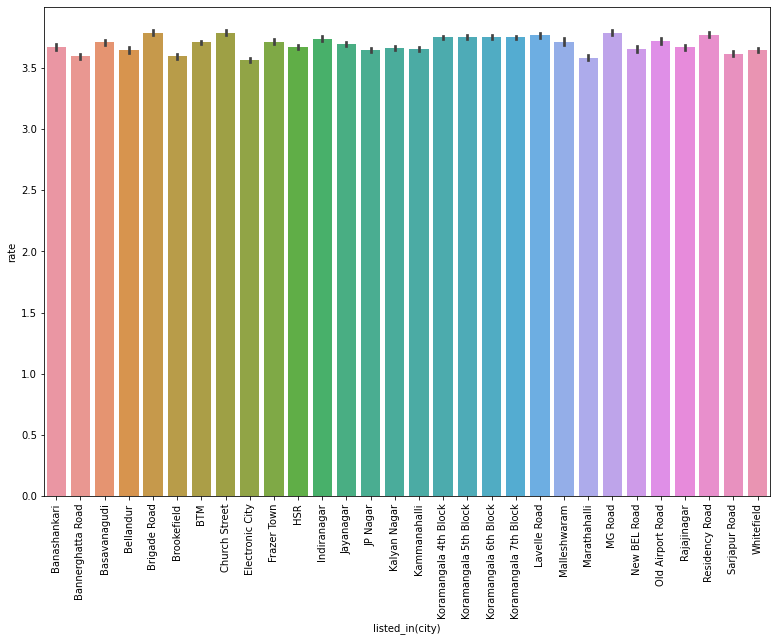

In [463]:
sns.barplot(data['listed_in(city)'], data['rate'])
plt.xticks(rotation=90);

In [464]:
data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

Text(0.5, 1.0, 'Top 20 cuisines')

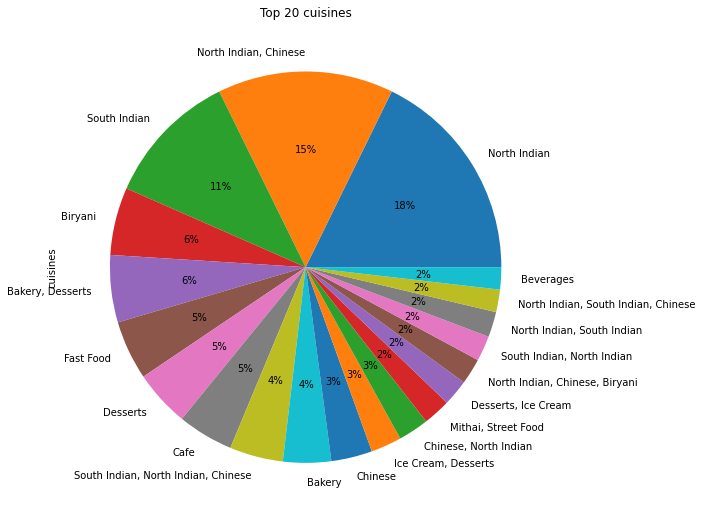

In [465]:
data['cuisines'].value_counts()[:20].plot.pie(autopct='%1.0f%%')
plt.title('Top 20 cuisines')

<AxesSubplot:xlabel='rate'>

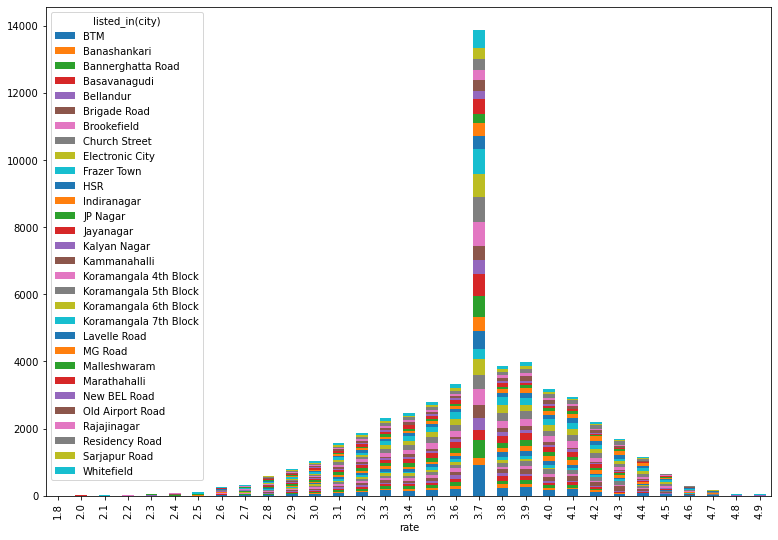

In [466]:
pd.crosstab(data['rate'],data['listed_in(city)']).plot(kind='bar', stacked=True)